In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [2]:
pd.set_option('display.max_columns', None)

# HW:
The data set includes the churn of customers of a telecommunications company.
The task is to create segments from customers based on their characteristics using the KMeans algorithm.

Do not use the following variables for grouping:
- churn?: has the customer dropped out?
- Contract_date: contract conclusion time
- Cust_ID: customer ID

In [3]:
file_path = "/content/telco_sampled.csv"
df = pd.read_csv(file_path, sep = ';')

In [4]:
df.head()

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
0,9/20/04 12:00 AM,PACK_B,Male,42.0,Married,Owner,University,Leader,15_30k,0.55,0.28,0.00,0.0,2.0,1.0,0.83,0.00,0.00,3.0,0.83,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0020614
1,2/12/05 12:00 AM,PACK_B,Female,53.0,Married,Owner,University,Public_Employee,Below_15k,11.32,6.53,6.98,26.0,37.0,19.0,6.70,8.02,10.12,21.0,21.90,58.0,25.70,5.28,15.38,52.0,77.0,32.0,11.07,12.80,22.50,30.0,37.33,128.0,25.33,0.00,7.60,51.0,49.0,20.0,1.83,14.52,16.58,36.0,32.93,83.0,11.95,3.60,4.28,25.0,40.0,25.0,0.93,6.20,12.70,21.0,19.83,66.0,0,ID0029505
2,10/19/04 12:00 AM,PACK_X,Male,43.0,Married,Owner,Highschool,Executive,30_60k,78.05,3.90,8.43,5.0,103.0,9.0,19.67,2.83,67.88,116.0,90.38,1.0,24.30,15.53,2.63,9.0,40.0,16.0,17.15,1.68,23.35,65.0,42.47,0.0,55.27,1.27,1.75,7.0,64.0,4.0,6.63,15.45,36.20,74.0,58.28,1.0,9.97,8.65,4.23,3.0,22.0,18.0,2.98,0.38,9.40,31.0,22.07,12.0,0,ID0050206
3,10/31/04 12:00 AM,PACK_B,Male,32.0,Married,Owner,Highschool,Labourer,15_30k,0.08,0.00,0.00,0.0,1.0,0.0,0.08,0.00,0.00,1.0,0.08,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0050343
4,11/19/04 12:00 AM,PACK_B,Female,31.0,Married,Owner,Highschool,Public_Employee,30_60k,20.68,13.87,33.27,49.0,30.0,26.0,37.90,0.53,23.02,79.0,67.82,26.0,42.08,24.48,31.10,39.0,56.0,28.0,65.58,1.53,26.10,100.0,97.67,23.0,31.52,28.27,28.37,33.0,48.0,46.0,50.80,0.62,31.17,103.0,86.70,21.0,49.68,35.90,29.45,69.0,78.0,47.0,71.17,2.13,31.05,121.0,111.40,64.0,0,ID0050688


In [5]:
df['churn?'].value_counts()

,count
churn?,
0,1224
1,341


# 1. Subtask: (data preparation)
Use all variables except for the three variables above when creating the clusters. Perform data preparation so that the variables are input to the model in the appropriate form.

(hint: categorical variables, missing values, scaling, etc.)

In [6]:
# Dropping the columns not required for clustering
df = df.drop(columns=['churn?', 'Contract_date', 'Cust_ID'])

In [7]:
# Handling categorical variables with OneHotEncoding and missing values
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [8]:
# Display the identified features for preprocessing
print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['Package', 'Gender', 'Marital_Status', 'Living_Condition', 'Graduation', 'Job_Type', 'Income']
Numerical Features: ['Age', 'Peak_minute_09', 'Weekend_minute_09', 'Offpeak_minute_09', 'Offpeak_nr_09', 'Peak_nr_09', 'Weekend_nr_09', 'Selfnet_minute_09', 'Fixed_minute_09', 'Othermob_minute_09', 'Voicemail_nr_09', 'Voicemail_minute_09', 'SMS_09', 'Peak_minute_10', 'Weekend_minute_10', 'Offpeak_minute_10', 'Offpeak_nr_10', 'Peak_nr_10', 'Weekend_nr_10', 'Selfnet_minute_10', 'Fixed_minute_10', 'Othermob_minute_10', 'Voicemail_nr_10', 'Voicemail_minute_10', 'SMS_10', 'Peak_minute_11', 'Weekend_minute_11', 'Offpeak_minute_11', 'Offpeak_nr_11', 'Peak_nr_11', 'Weekend_nr_11', 'Selfnet_minute_11', 'Fixed_minute_11', 'Othermob_minute_11', 'Voicemail_nr_11', 'Voicemail_minute_11', 'SMS_11', 'Peak_minute_12', 'Weekend_minute_12', 'Offpeak_minute_12', 'Offpeak_nr_12', 'Peak_nr_12', 'Weekend_nr_12', 'Selfnet_minute_12', 'Fixed_minute_12', 'Othermob_minute_12', 'Voicemail_nr_12'

In [10]:
# Apply scaling only to numerical columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [16]:
# Pipelines for numerical and categorical data processing
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [17]:
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df)

In [18]:
# Display shape and preview of preprocessed data
print("Preprocessed Data Shape:", X_preprocessed.shape)
print(pd.DataFrame(X_preprocessed).head())


Preprocessed Data Shape: (1565, 72)
         0         1         2         3         4         5         6   \
0  0.683179 -0.490696 -0.521675 -0.459272 -0.590807 -0.567464 -0.593901   
1  1.638421 -0.290959 -0.302073 -0.312966  0.204770  0.057757  0.073678   
2  0.770020  0.946595 -0.394482 -0.282573 -0.437812  1.236744 -0.297199   
3 -0.185222 -0.499413 -0.531513 -0.459272 -0.590807 -0.585328 -0.630988   
4 -0.272062 -0.117372 -0.044174  0.238093  0.908549 -0.067288  0.333292   

         7         8         9         10        11        12        13  \
0 -0.439902 -0.392252 -0.455270 -0.587854 -0.566961 -0.400519 -0.499263   
1 -0.337945  0.339403 -0.318874 -0.375662 -0.379413  0.822817  0.041093   
2 -0.112668 -0.134075  0.459603  0.744239  0.230140 -0.379427  0.011658   
3 -0.452929 -0.392252 -0.455270 -0.611430 -0.573637 -0.400519 -0.499263   
4  0.203970 -0.343901 -0.145011  0.308067  0.029330  0.147873  0.385491   

         14        15        16        17        18        19

# 2. Subtask: (clustering)
Find the optimal k value for the KMeans algorithm using the variables prepared in the previous task. Then group the customers.

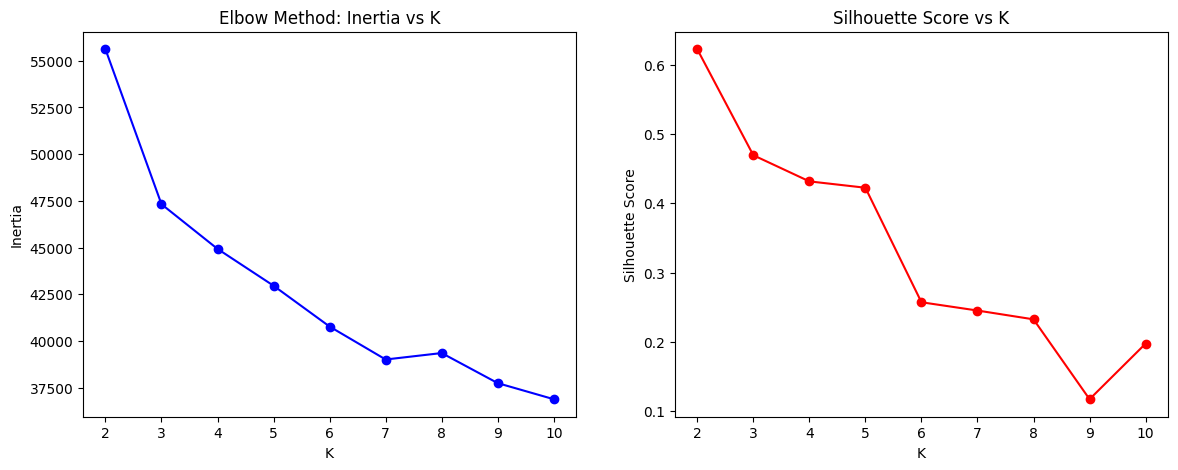

In [29]:
# 2. Clustering: Using Elbow method and Silhouette Score to find optimal k
def find_optimal_k(X):
    inertia = []
    silhouette_scores = []
    K_values = range(2, 11)  # Define K_values instead of K to avoid conflict with other variables

    for k in K_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    # Plotting the results for Elbow method and Silhouette score
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K_values, inertia, 'bo-')
    plt.title('Elbow Method: Inertia vs K')
    plt.xlabel('K')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(K_values, silhouette_scores, 'ro-')
    plt.title('Silhouette Score vs K')
    plt.xlabel('K')
    plt.ylabel('Silhouette Score')

    plt.show()

# Now calling the function again to display the plots
find_optimal_k(X_preprocessed)


In [35]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_preprocessed)

# 3. Subtask: (explaination of clusters / conclusions)
Try to find an explanation of what characterizes each group and what characteristics caused each customer to be in the given cluster.


Cluster Summary (Mean of Numerical Features by Cluster):
              Age  Peak_minute_09  Weekend_minute_09  Offpeak_minute_09  \
Cluster                                                                   
0       -0.218669        0.568882           0.622248           0.591614   
1        0.069075       -0.289653          -0.292550          -0.283507   
2       -0.345191        2.321277           2.317799           2.362378   
3       -0.208906        5.302894           4.267772           3.826791   

         Offpeak_nr_09  Peak_nr_09  Weekend_nr_09  Selfnet_minute_09  \
Cluster                                                                
0             0.640942    0.653563       0.638511           0.586077   
1            -0.307501   -0.304427      -0.296558          -0.271135   
2             2.369790    2.196356       2.191580           2.150680   
3             5.167388    5.402176       4.945652           3.700811   

         Fixed_minute_09  Othermob_minute_09  Voicemail_nr

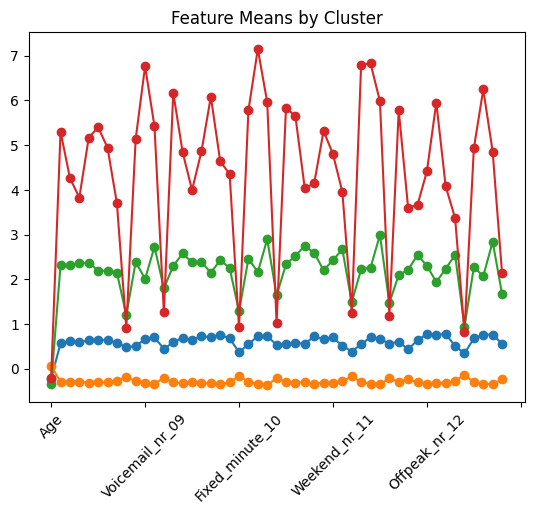

In [37]:
# 3. Conclusions: Analyze clusters by selecting only numerical columns for the cluster summary
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Group by clusters and compute the mean of numerical columns
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()

# Display cluster summary to analyze the characteristics
print("\nCluster Summary (Mean of Numerical Features by Cluster):")
print(cluster_summary)

# Visualization to plot means of numerical features across clusters
cluster_summary.T.plot(marker='o', legend=None)
plt.xticks(rotation=45)
plt.title('Feature Means by Cluster')
plt.show()
